# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 7:** $\underline{Analisando\ Dados\ de\ Queimadas}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como **baixar**, **analisar** e **plotar figuras** dos dados de focos de calor estimado por satélites. O objetivo é analisar a série temporal de queimadas para um determinado Estado do Brasil.

---


**DADOS DE ENTRADA**: Serão utilizados dados de queimadas do portal **BDQUEIMADAS** do CPTEC/INPE. Existem dois tipos de dados de queimadas que podem ser utilizados:

1. [Dados em tempo real em mapas](http://terrabrasilis.dpi.inpe.br/queimadas/bdqueimadas/)

2. [Dados históricos](https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/). São dados nas escalas temporais:
    1. **10min**: dados do mês atual
    2. **anual**: dados desde 2003
    3. **diário**: dados do mês atual
    4. **mensal**: dados do ano atual



---


**DADOS DE SAÍDA:**
- **Tipo do dado:** Figuras e arquivo texto
- **Formato do dado:** JPG e CSV
- **Imagens geradas:**
    1. Fig_1_horaria_climatologica.jpg
    2. Fig_2_diario.jpg
    3. Fig_3_mensal.jpg
    4. Fig_4_mensal_climatologia.jpg
    5. Fig_5_anual.jpg
    6. Fig_6_calendar_plot.jpg
    7. Fig_7_cidades.jpg
    8. Fig_8_biomas.jpg
    9. focos_mensal.csv


---


**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Tratamento dos dados
2.   Plotar gráfico do **ciclo horário**
3.   Plotar gráfico do **ciclo diário**
4.   Plotar gráfico do **ciclo mensal**
5.   Plotar gráfico do **ciclo anual**
6.   Plotar gráfico calendarplot
7.   Encontrando a **cidade** com a **maior** ocorrência de focos de calor
8.   Encontrando o **bioma** com a **maior** ocorrência de focos de calor

---


**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Leitura dos dados
6.   Transformação da data/hora para índice da tabela
7.   Tratamento dos dados: calculando as climatologias
8.   Plota a climatologia horária de focos de calor
9.   Plota o ciclo diário de focos de calor
10.  Plota o ciclo mensal (total e climatológico) de focos de calor
11.  Plota o ciclo anual
12.  Salva os dados mensais num arquivo CSV
13.  Análise da cidade com a maior ocorrência de focos de calor
14.  Análise do bioma com a maior ocorrência de focos de calor

---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 21/09/2023


---

# **1° Passo:** Instalando as bibliotecas

In [275]:
# Instalando o proplot (usado para gerar gráficos)
!pip install -q proplot calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

# **2° Passo:** Montando drive

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [83]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/'

- Criando a pasta de saída ("output")

In [84]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas

In [289]:
import glob                     # glob: lista arquivos do diretório
import numpy as np              # NumPy: trabalha com arrays
import pandas as pd             # Pandas: trabalha com tabelas
import matplotlib.pyplot as plt # Matplotlib: o fundamento de toda a criação de gráficos em Python.
import proplot as pplt          # Proplot: pacote de visualização de gráficos e mapas com dados meteorológicos em alto nível.
import pytz                     # Pytz: transforma hora UTC para hora local
import seaborn as sns           # Seaborn: trabalha com gráficos estatísticos
import time                     # Time: contabiliza o tempo de uma operação
import calplot

# vamos ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# **PARTE 1):** Leitura dos dados

**Monta lista dos arquivos do drive**. São listados todos os arquivos que estão na pasta **input** e que o nome inicia com `Focos_20`. São arquivos que possuem os focos de calor de todos os satélites para um determinado ano. No exemplo a seguir usaremos os arquivos de 2011 a 2020.

In [399]:
files = sorted(glob.glob(f'{dir}input/Focos_20*'))
files

['/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2011-01-01_2011-12-31.csv',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2012-01-01_2012-12-31.csv',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2013-01-01_2013-12-31.csv',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2014-01-01_2014-12-31.cs

**Faz a leitura e concatena os arquivos**. Iremos ler cada um dos arquivos de cada ano e juntar eles num único arquivo. Para ler os arquivos usaremos a função [**read_csv**](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) e para juntar os arquivos a função [**concat**](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), ambas da biblioteca [pandas](https://pandas.pydata.org/).

In [400]:
%%time
# cria uma tabela (conhecida também com o nome em inglês de "dataframe") vazia
df = pd.DataFrame()

# loop de cada arquivo da lista "files"
for file in files:

    # leitura da tabela
    df0 = pd.read_csv(file)

    # junta a tabela que foi lida com a anterior
    df = pd.concat([df, df0], ignore_index=True)

    # imprime o nome do arquivo lido na tela
    print(file, df0.shape[0])

/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2011-01-01_2011-12-31.csv 38591
/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2012-01-01_2012-12-31.csv 115546
/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2013-01-01_2013-12-31.csv 59656
/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_07_QUEIMADAS/input/Focos_2014-01-01_2014-12-

**Exibe a tabela**:
- A tabela de dados contêm 12 colunas de informações, que são:
1. **datahora** (Exemplo: 2011/01/01 16:43:00): ano, mês, dia hora, minuto e segundo do foco de calor
2. **satelite** (Exemplo: AQUA_M-T): satélite que detectou o foco de calor
3. **pais** (Exemplo: Brasil): pais onde ocorreu o foco de calor
4. **estado** (Exemplo: MINAS GERAIS): Estado que ocorreu o foco de calor
5. **municipio** (Exemplo: CANDEIAS): cidade que ocorreu o foco de calor
6. **bioma** (Exemplo: Mata Atlantica): bioma que ocorreu o foco de calor
7. **diasemchuva** (Exemplo: 2.0): quantidade de dias sem chuvas da localidade
8. **precipitacao** (Exemplo: 0.0): valor da precipitação da localidade
9. **riscofogo** (Exemplo: 0.2): valor do risco de fogo da localidade
10. **latitude** (Exemplo: -20.89940): latitude do foco de calor
11. **longitude** (Exemplo: -43.81924): longitude do foco de calor
12. **frp** (Exemplo: 0.9): significa *Fire Radiative Power* e mede a energia radiante liberada por unidade de tempo, associada à taxa de queima da vegetação, em MW - megawatts. Esse valor é derivado a partir da comparação da energia medida no canal termal do píxel com fogo no seu interior com os pixels de seu entorno. Maiores informações click [aqui](http://terrabrasilis.dpi.inpe.br/queimadas/portal/faq/index.html).


In [401]:
# mostrando a tabela contendo todos os focos de calor de 2011 a 2021 capturados por todos os satélites para o Estado de MG
df

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
1,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2,2011/01/01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
3,2011/01/03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
4,2011/01/05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
869615,2020/01/14 16:15:00,AQUA_M-T,Brasil,MINAS GERAIS,RUBELITA,Mata Atlantica,8.0,0.0,0.4,-16.344,-42.142,79.7
869616,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.4,-17.003,-41.197,48.3
869617,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.5,-17.001,-41.180,48.4
869618,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,ITINGA,Mata Atlantica,9.0,0.0,0.4,-16.533,-41.964,38.9


**Informações do formato das colunas**

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869620 entries, 0 to 869619
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datahora      869620 non-null  object 
 1   satelite      869620 non-null  object 
 2   pais          869620 non-null  object 
 3   estado        869620 non-null  object 
 4   municipio     869620 non-null  object 
 5   bioma         869620 non-null  object 
 6   diasemchuva   655681 non-null  float64
 7   precipitacao  655681 non-null  float64
 8   riscofogo     655681 non-null  float64
 9   latitude      869620 non-null  float64
 10  longitude     869620 non-null  float64
 11  frp           136821 non-null  float64
dtypes: float64(6), object(6)
memory usage: 79.6+ MB


**Exemplo de como selecionar os dados referente a cidade de Itajubá**

In [403]:
df['municipio'] == 'ITAJUBA'

0         False
1         False
2         False
3         False
4         False
          ...  
869615    False
869616    False
869617    False
869618    False
869619    False
Name: municipio, Length: 869620, dtype: bool

In [404]:
df[ df['municipio'] == 'ITAJUBA']

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
8947,2011/08/18 17:00:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,NaN,NaN,NaN,-22.42700,-45.445,NaN
15414,2011/09/06 13:08:00,TERRA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,NaN,NaN,NaN,-22.43200,-45.440,NaN
17036,2011/09/07 19:18:02,NOAA-15,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,NaN,NaN,NaN,-22.50167,-45.405,NaN
18368,2011/09/09 16:23:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,NaN,NaN,NaN,-22.42400,-45.429,NaN
18375,2011/09/09 16:23:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,NaN,NaN,NaN,-22.42500,-45.436,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
863238,2020/09/08 16:30:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,16.0,0.0,-999.0,-22.40200,-45.441,69.2
863239,2020/09/08 16:30:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,17.0,0.0,1.0,-22.40600,-45.473,10.5
864261,2020/09/13 16:45:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,22.0,0.0,0.9,-22.44900,-45.413,27.3
864262,2020/09/13 16:45:00,AQUA_M-T,Brasil,MINAS GERAIS,ITAJUBA,Mata Atlantica,22.0,0.0,1.0,-22.44000,-45.415,15.4


**Selecionando os dados do satélite de referência [AQUA](https://space.oscar.wmo.int/satellites/view/aqua)**

In [405]:
# satélites disponíveis
df['satelite'].unique()

array(['AQUA_M-T', 'TERRA_M-M', 'NOAA-16', 'ATSR', 'AQUA_M-M', 'NOAA-15',
       'NOAA-15D', 'TERRA_M-T', 'GOES-12', 'TRMM', 'MSG-02', 'NOAA-18',
       'NOAA-18D', 'NOAA-19D', 'NOAA-19', 'NOAA-16N', 'GOES-13',
       'NPP-375', 'MSG-03', 'METOP-B', 'GOES-16', 'NOAA-20', 'METOP-C'],
      dtype=object)

In [406]:
df[ df['satelite'] == 'AQUA_M-T']

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
1,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2,2011/01/01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
3,2011/01/03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
4,2011/01/05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
869615,2020/01/14 16:15:00,AQUA_M-T,Brasil,MINAS GERAIS,RUBELITA,Mata Atlantica,8.0,0.0,0.4,-16.344,-42.142,79.7
869616,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.4,-17.003,-41.197,48.3
869617,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.5,-17.001,-41.180,48.4
869618,2020/01/16 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,ITINGA,Mata Atlantica,9.0,0.0,0.4,-16.533,-41.964,38.9


In [407]:
df = df[ df['satelite'] == 'AQUA_M-T']

# **PARTE 2):** Transforma a coluna de **Data/hora** para `Datetime` e transforma em `índice`.
- Como iremos trabalhar com **Séries Temporais** precisaremos transformar a coluna de **data** da tabela em *índice*. Para isto faremos dois importantes passos:
    1. O primeiro passo será transformar a coluna *data* para formato de data, usando a função [**to_datetime**](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) do pandas. Veja que o formato dela é *object* e depois será *datetime64[ns]*.
    2. Para selecionarmos pedaços (no python chamamos esse procedimento de *slicing*) específicos de uma série temporal de dados, precisamos transformar a nossa coluna data no índice da nossa tabela. Para isso, no nosso segundo passo usaremos a função [**set_index**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) do pandas.

In [408]:
# mostrando a tabela
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
1,2011/01/01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2,2011/01/01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
3,2011/01/03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
4,2011/01/05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN


In [409]:
# mostrando a coluna "datahora" ANTES da transformação em "datetime"
df['datahora'].head()

0    2011/01/01 16:43:00
1    2011/01/01 16:43:00
2    2011/01/01 16:44:00
3    2011/01/03 16:32:00
4    2011/01/05 16:19:00
Name: datahora, dtype: object

In [410]:
# mostrando o formato das colunas. Veja que a coluna "datahora" tem o formato de "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86316 entries, 0 to 869619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datahora      86316 non-null  object 
 1   satelite      86316 non-null  object 
 2   pais          86316 non-null  object 
 3   estado        86316 non-null  object 
 4   municipio     86316 non-null  object 
 5   bioma         86316 non-null  object 
 6   diasemchuva   58933 non-null  float64
 7   precipitacao  58933 non-null  float64
 8   riscofogo     58933 non-null  float64
 9   latitude      86316 non-null  float64
 10  longitude     86316 non-null  float64
 11  frp           23315 non-null  float64
dtypes: float64(6), object(6)
memory usage: 8.6+ MB


In [411]:
# transformando a coluna "datahora" para "datetime"
df['datahora'] = pd.to_datetime(df['datahora'], format='%Y/%m/%d')

In [412]:
# mostrando a coluna "datahora"  da transformações em "datetime"
df['datahora'].head()

0   2011-01-01 16:43:00
1   2011-01-01 16:43:00
2   2011-01-01 16:44:00
3   2011-01-03 16:32:00
4   2011-01-05 16:19:00
Name: datahora, dtype: datetime64[ns]

In [413]:
# mostrando o formato das colunas. Veja que agora a coluna "datahora" tem o formato de "datetime64[ns]"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86316 entries, 0 to 869619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datahora      86316 non-null  datetime64[ns]
 1   satelite      86316 non-null  object        
 2   pais          86316 non-null  object        
 3   estado        86316 non-null  object        
 4   municipio     86316 non-null  object        
 5   bioma         86316 non-null  object        
 6   diasemchuva   58933 non-null  float64       
 7   precipitacao  58933 non-null  float64       
 8   riscofogo     58933 non-null  float64       
 9   latitude      86316 non-null  float64       
 10  longitude     86316 non-null  float64       
 11  frp           23315 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 8.6+ MB


In [414]:
# mostrando a tabela
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
1,2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2,2011-01-01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
3,2011-01-03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
4,2011-01-05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN


In [415]:
# seta a coluna "datahora" para índice da tabela
df.set_index('datahora', inplace=True)

In [416]:
# mostrando a tabela alguma com a coluna "datahora" como índice. Veja que a coluna "datahora" ficou em negrito
df.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2011-01-01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
2011-01-03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
2011-01-05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN


Com a coluna "datahora" agora como `índice` da nossa tabela, podemos escolher alguns "pedaços" da nossa série temporal para um período específico.

In [417]:
# fazendo um fatiamento temporal entre 2011 e 2015
df['2011-01-01':'2015-12-31']

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2011-01-01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
2011-01-03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
2011-01-05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2015-11-02 16:06:00,AQUA_M-T,Brasil,MINAS GERAIS,CONSELHEIRO PENA,Mata Atlantica,4.0,0.0,1.0,-19.344,-41.647,NaN
2015-08-24 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,CORINTO,Cerrado,17.0,0.0,1.0,-18.517,-44.670,NaN
2015-11-05 16:37:00,AQUA_M-T,Brasil,MINAS GERAIS,AGUA BOA,Mata Atlantica,6.0,0.0,1.0,-18.140,-42.278,NaN


# **PARTE 3):** Tratamento dos dados: DataFrames com `Pandas`. Nesta etapa são criadas as seguintes variáveis:
* 1. horaria_climatologica
* 2. diaria
* 3. mensal
* 4. mensal_climatologia
* 5. anual

##**a) Visualizando a tabela de dados e as datas em formato de índices**

In [418]:
# mostrando a tabela
df.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
2011-01-01 16:43:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2011-01-01 16:44:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
2011-01-03 16:32:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
2011-01-05 16:19:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN


In [419]:
# mostrando os nomes dos índices da tabela
df.index

DatetimeIndex(['2011-01-01 16:43:00', '2011-01-01 16:43:00',
               '2011-01-01 16:44:00', '2011-01-03 16:32:00',
               '2011-01-05 16:19:00', '2011-01-08 16:50:00',
               '2011-01-08 16:50:00', '2011-01-08 16:50:00',
               '2011-01-08 16:50:00', '2011-01-08 16:50:00',
               ...
               '2020-01-01 16:45:00', '2020-01-10 16:40:00',
               '2020-01-10 16:40:00', '2020-01-17 16:45:00',
               '2020-01-14 16:15:00', '2020-01-14 16:15:00',
               '2020-01-16 16:05:00', '2020-01-16 16:05:00',
               '2020-01-16 16:05:00', '2020-02-04 16:35:00'],
              dtype='datetime64[ns]', name='datahora', length=86316, freq=None)

In [420]:
# mostramdo os nomes das colunas da tabela
df.columns

Index(['satelite', 'pais', 'estado', 'municipio', 'bioma', 'diasemchuva',
       'precipitacao', 'riscofogo', 'latitude', 'longitude', 'frp'],
      dtype='object')

##**b) Convertendo de `Hora UTC` para `Hora Local`**. Para converter os horários de **horário UTC** para **Hora Local** usaremos a biblioteca chamada [pytz](https://pypi.org/project/pytz/).

1. Precisamos primeiro "dizer" para o `pytz` que os tempos atuais da tabela acima estão em UTC. Isso é feito usando a função [tz_localize(pytz.utc)](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html).

2.   Depois teremos que fazer a conversão. Para isto usaremos a função [tz_convert](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.tz_convert.html) de acordo com o fuso-horário local. Para **Minas Gerais**, podemos usar o mesmo fuso de São Paulo com `pytz.timezone('America/Sao_Paulo')`.

3.  O `pytz` possui uma lista extensa de horários ao longo do globo, o que vai ser muito útil para a nossa conversão.

In [421]:
# mostrar todos os fusos-horários
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [422]:
# mostrando a coluna do índice da tabela
df.index

DatetimeIndex(['2011-01-01 16:43:00', '2011-01-01 16:43:00',
               '2011-01-01 16:44:00', '2011-01-03 16:32:00',
               '2011-01-05 16:19:00', '2011-01-08 16:50:00',
               '2011-01-08 16:50:00', '2011-01-08 16:50:00',
               '2011-01-08 16:50:00', '2011-01-08 16:50:00',
               ...
               '2020-01-01 16:45:00', '2020-01-10 16:40:00',
               '2020-01-10 16:40:00', '2020-01-17 16:45:00',
               '2020-01-14 16:15:00', '2020-01-14 16:15:00',
               '2020-01-16 16:05:00', '2020-01-16 16:05:00',
               '2020-01-16 16:05:00', '2020-02-04 16:35:00'],
              dtype='datetime64[ns]', name='datahora', length=86316, freq=None)

In [423]:
# convertendo a coluna "datahora" de "UTC" para "hora local"
df = df.set_index(df.index.tz_localize(pytz.utc).tz_convert(pytz.timezone('America/Sao_Paulo')))

In [424]:
# mostrando a tabela
df

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN
2011-01-01 14:44:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN
2011-01-03 14:32:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN
2011-01-05 14:19:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14 13:15:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,RUBELITA,Mata Atlantica,8.0,0.0,0.4,-16.344,-42.142,79.7
2020-01-16 13:05:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.4,-17.003,-41.197,48.3
2020-01-16 13:05:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.5,-17.001,-41.180,48.4


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86316 entries, 2011-01-01 14:43:00-02:00 to 2020-02-04 13:35:00-03:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   satelite      86316 non-null  object 
 1   pais          86316 non-null  object 
 2   estado        86316 non-null  object 
 3   municipio     86316 non-null  object 
 4   bioma         86316 non-null  object 
 5   diasemchuva   58933 non-null  float64
 6   precipitacao  58933 non-null  float64
 7   riscofogo     58933 non-null  float64
 8   latitude      86316 non-null  float64
 9   longitude     86316 non-null  float64
 10  frp           23315 non-null  float64
dtypes: float64(6), object(5)
memory usage: 7.9+ MB


In [426]:
# cria uma coluna com o valor "1" para todas as linhas
df['flag'] = 1

In [427]:
# mostra a tabela
df.head()

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,,,,,,
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN,1
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN,1
2011-01-01 14:44:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN,1
2011-01-03 14:32:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN,1
2011-01-05 14:19:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN,1


In [428]:
# mostrando o formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86316 entries, 2011-01-01 14:43:00-02:00 to 2020-02-04 13:35:00-03:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   satelite      86316 non-null  object 
 1   pais          86316 non-null  object 
 2   estado        86316 non-null  object 
 3   municipio     86316 non-null  object 
 4   bioma         86316 non-null  object 
 5   diasemchuva   58933 non-null  float64
 6   precipitacao  58933 non-null  float64
 7   riscofogo     58933 non-null  float64
 8   latitude      86316 non-null  float64
 9   longitude     86316 non-null  float64
 10  frp           23315 non-null  float64
 11  flag          86316 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 8.6+ MB


##**c) Calculando estatísticas**
- Nos dados da tabela **df** cada linha representa uma ocorrência de foco de calor para uma determinada data específica. Então por exemplo, se quisermos calcular o total de focos de calor para cada hora teremos que somar todas as ocorrências desde 2011 até 2020 para cada horário. Basicamente queremos **agrupar** os focos de calor por hora.
- Para isto temos uma função bastante útil da biblioteca pandas chamada [**groupby**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).
- Nessa função precisaremos informar por qual coluna queremos agrupar, e depois de agrupar os dados, precisamos indicar qual operação gostaríamos de realizar com os dados agrupados, isto é: `somar`, `calcular` a `média` e `etc`.

**HORÁRIA**:
- No exemplo a seguir agruparemos os dados por hora e depois somamos os focos de calor de cada hora.

In [429]:
# calculando a horária climatológica
horaria_climatologica = df.groupby(df.index.hour).sum()

In [430]:
# mostrando a horária climatológica
horaria_climatologica

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
12,7266.0,201.8,-4523.7,-1.376758e+04,-3.369622e+04,27010.3,804
13,632325.0,10726.7,-510362.1,-1.016339e+06,-2.463800e+06,834247.6,55626
14,261734.0,6706.0,-203892.5,-5.200540e+05,-1.278533e+06,389478.7,28416
15,5678.0,1435.7,-7342.2,-2.601276e+04,-6.619357e+04,1127.2,1470


**DIÁRIA**:
- No exemplo dos focos de calor diário, gostaríamos de calcular a quantidade de focos de calor que ocorreu para cada dia, desde 1 de janeiro de 2011 até 31 de dezembro de 2020.
- Para isto usaremos a função **groupby**, e como argumento utilizaremos a função [**Grouper**](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) do pandas. Usaremos o argumento **Freq='1D'** para dizer que queremos agrupar os dados por dia.

In [431]:
# calculando a diária total
diaria = df.groupby(pd.Grouper(freq='1D')).sum()

In [432]:
# mostrando a diária total
diaria

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-01-01 00:00:00-02:00,0.0,0.0,0.0,-58.144,-147.301,0.0,3
2011-01-02 00:00:00-02:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2011-01-03 00:00:00-02:00,0.0,0.0,0.0,-17.530,-42.197,0.0,1
2011-01-04 00:00:00-02:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2011-01-05 00:00:00-02:00,0.0,0.0,0.0,-17.632,-40.447,0.0,1
...,...,...,...,...,...,...,...
2020-12-27 00:00:00-03:00,4.0,0.0,0.8,-15.306,-44.098,15.5,1
2020-12-28 00:00:00-03:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2020-12-29 00:00:00-03:00,6.0,0.0,1.0,-15.543,-44.443,23.7,1


**MENSAL**:
- No exemplo a seguir agrupamos os dados por mês e depois somamos os focos de calor de cada mês.

In [433]:
# calculando a mensal total
mensal = df.groupby(pd.Grouper(freq='1M')).sum()

In [434]:
# mostrando a mensal total
mensal

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-01-31 00:00:00-02:00,0.0,0.0,0.0,-1957.957000,-4975.205000,0.0,112
2011-02-28 00:00:00-03:00,0.0,0.0,0.0,-2340.205000,-5792.228000,0.0,131
2011-03-31 00:00:00-03:00,0.0,0.0,0.0,-1457.609000,-3625.815000,0.0,82
2011-04-30 00:00:00-03:00,0.0,0.0,0.0,-1759.648000,-4413.562000,0.0,97
2011-05-31 00:00:00-03:00,0.0,0.0,0.0,-3610.417000,-9070.806000,0.0,201
...,...,...,...,...,...,...,...
2020-08-31 00:00:00-03:00,52481.0,58.1,-20947.3,-22547.927349,-53218.473272,48837.3,1155
2020-09-30 00:00:00-03:00,145785.0,572.4,-56615.3,-64987.996000,-156557.300000,238078.8,3467
2020-10-31 00:00:00-03:00,28535.0,2078.9,-11764.6,-42671.129000,-107413.933000,199356.0,2404


In [435]:
# calculando a mensal climatológica
mensal_climatologia = mensal.groupby(mensal.index.month).mean()

In [436]:
# mostrando a a mensal climatológica
mensal_climatologia

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
1,311.8,79.02,-2362.88,-1730.367500,-4300.484300,617.66,97.2
2,280.1,107.13,-3467.80,-1947.213600,-4850.702500,554.06,108.8
3,199.3,74.37,-1065.69,-1834.898800,-4603.882800,740.12,102.9
4,426.8,23.29,-745.34,-1919.227800,-4759.529200,393.22,106.5
5,710.8,15.85,-1307.04,-2974.219500,-7397.538900,1096.64,164.2
6,2512.0,15.31,-2428.09,-4815.918700,-11877.613500,2304.82,262.8
7,10570.8,35.54,-10395.08,-11782.098400,-28372.327500,6167.98,626.9
8,17642.8,153.96,-14838.26,-25138.632335,-60085.712627,13345.42,1330.0
9,37046.8,327.31,-21541.11,-56087.839500,-136051.427400,57856.32,3047.5


**ANUAL**

In [437]:
# calculando a anual total
anual = df.groupby(pd.Grouper(freq='1Y')).sum()

In [438]:
# mostrando a anual total
anual

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-12-31 00:00:00-02:00,0.0,0.0,0.0,-214250.864000,-521832.473000,0.0,11766
2012-12-31 00:00:00-02:00,0.0,0.0,0.0,-175763.327000,-445385.607000,0.0,10108
2013-12-31 00:00:00-02:00,0.0,0.0,0.0,-96271.588000,-239336.673000,0.0,5387
2014-12-31 00:00:00-02:00,153750.0,3428.3,-126073.9,-209700.268000,-504631.579000,0.0,11337
2015-12-31 00:00:00-02:00,152866.0,2912.4,-60880.7,-167173.629000,-415585.819000,0.0,9490
2016-12-31 00:00:00-02:00,100491.0,2940.9,-85122.5,-122118.043000,-293014.663000,0.0,6482
2017-12-31 00:00:00-02:00,3463.0,1594.2,-127015.7,-158915.974000,-377055.884000,0.0,8383
2018-12-31 00:00:00-02:00,62692.0,1549.2,-53950.5,-83937.722000,-206218.326000,206586.1,4627
2019-12-31 00:00:00-03:00,177758.0,2916.0,-136014.4,-186064.783000,-444468.238000,511927.3,9999


O nosso próximo passo será plotar os gráficos das variáveis temporais calculadas anteriormente.

# **PARTE 4a):** Ciclo Horário: Climatológica

In [439]:
horaria_climatologica

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
12,7266.0,201.8,-4523.7,-1.376758e+04,-3.369622e+04,27010.3,804
13,632325.0,10726.7,-510362.1,-1.016339e+06,-2.463800e+06,834247.6,55626
14,261734.0,6706.0,-203892.5,-5.200540e+05,-1.278533e+06,389478.7,28416
15,5678.0,1435.7,-7342.2,-2.601276e+04,-6.619357e+04,1127.2,1470


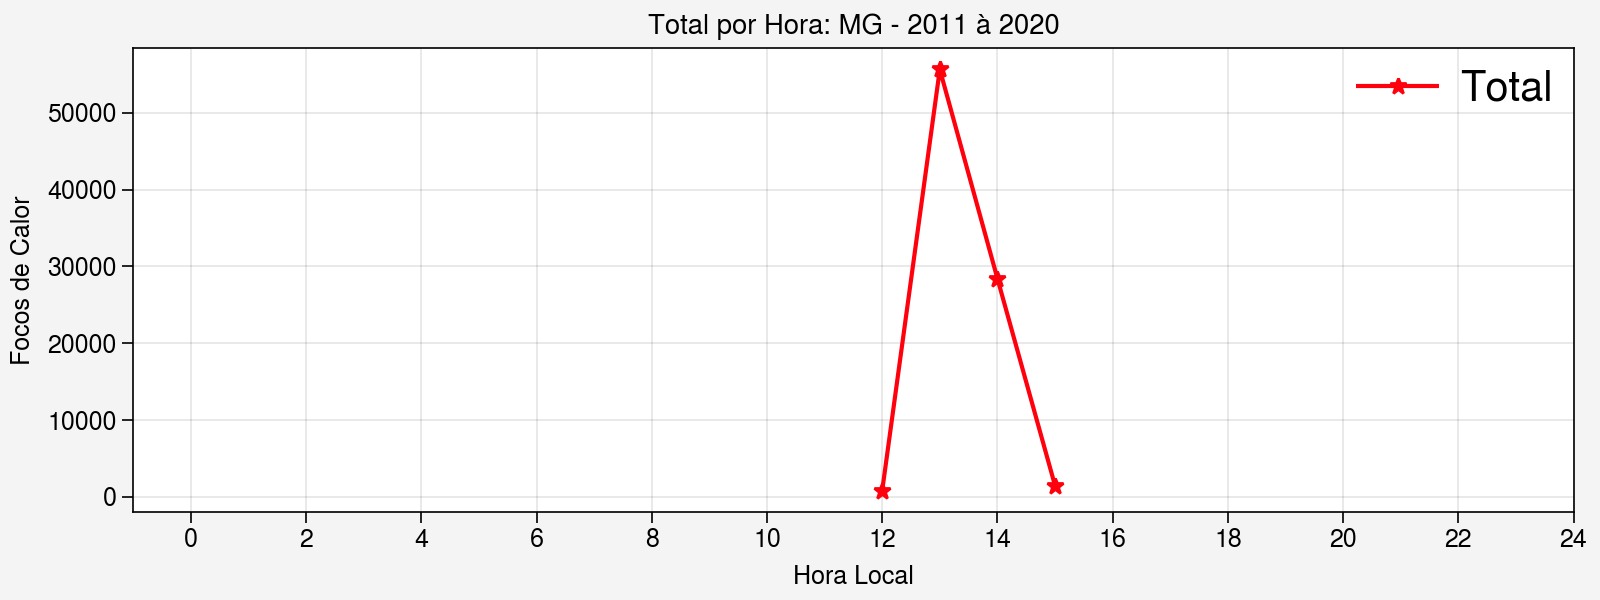

In [440]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(8, 3), sharey=False, tight=True)

# plota os focos de caloe
ax.plot(horaria_climatologica.index,
        horaria_climatologica['flag'].values,
        color='bright red',
        marker='*',
        label='Total')

# formatação dos eixos
ax.format(title='Total por Hora: MG - 2011 à 2020',
          xlabel='Hora Local',
          ylabel='Focos de Calor',
          xticks=2,
          xtickminor=False,
          ytickminor=False,
          xlim=(-1,24))

# legendas
ax.legend(frameon=False, prop={'size': 15})

# salva figura
fig.save(f'{dir}output/Fig_1_horaria_climatologica.jpg', dpi=300)

# exibe a figura na tela
pplt.show()

# **PARTE 4b):** Ciclo Diário: Total

In [441]:
diaria

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-01-01 00:00:00-02:00,0.0,0.0,0.0,-58.144,-147.301,0.0,3
2011-01-02 00:00:00-02:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2011-01-03 00:00:00-02:00,0.0,0.0,0.0,-17.530,-42.197,0.0,1
2011-01-04 00:00:00-02:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2011-01-05 00:00:00-02:00,0.0,0.0,0.0,-17.632,-40.447,0.0,1
...,...,...,...,...,...,...,...
2020-12-27 00:00:00-03:00,4.0,0.0,0.8,-15.306,-44.098,15.5,1
2020-12-28 00:00:00-03:00,0.0,0.0,0.0,0.000,0.000,0.0,0
2020-12-29 00:00:00-03:00,6.0,0.0,1.0,-15.543,-44.443,23.7,1


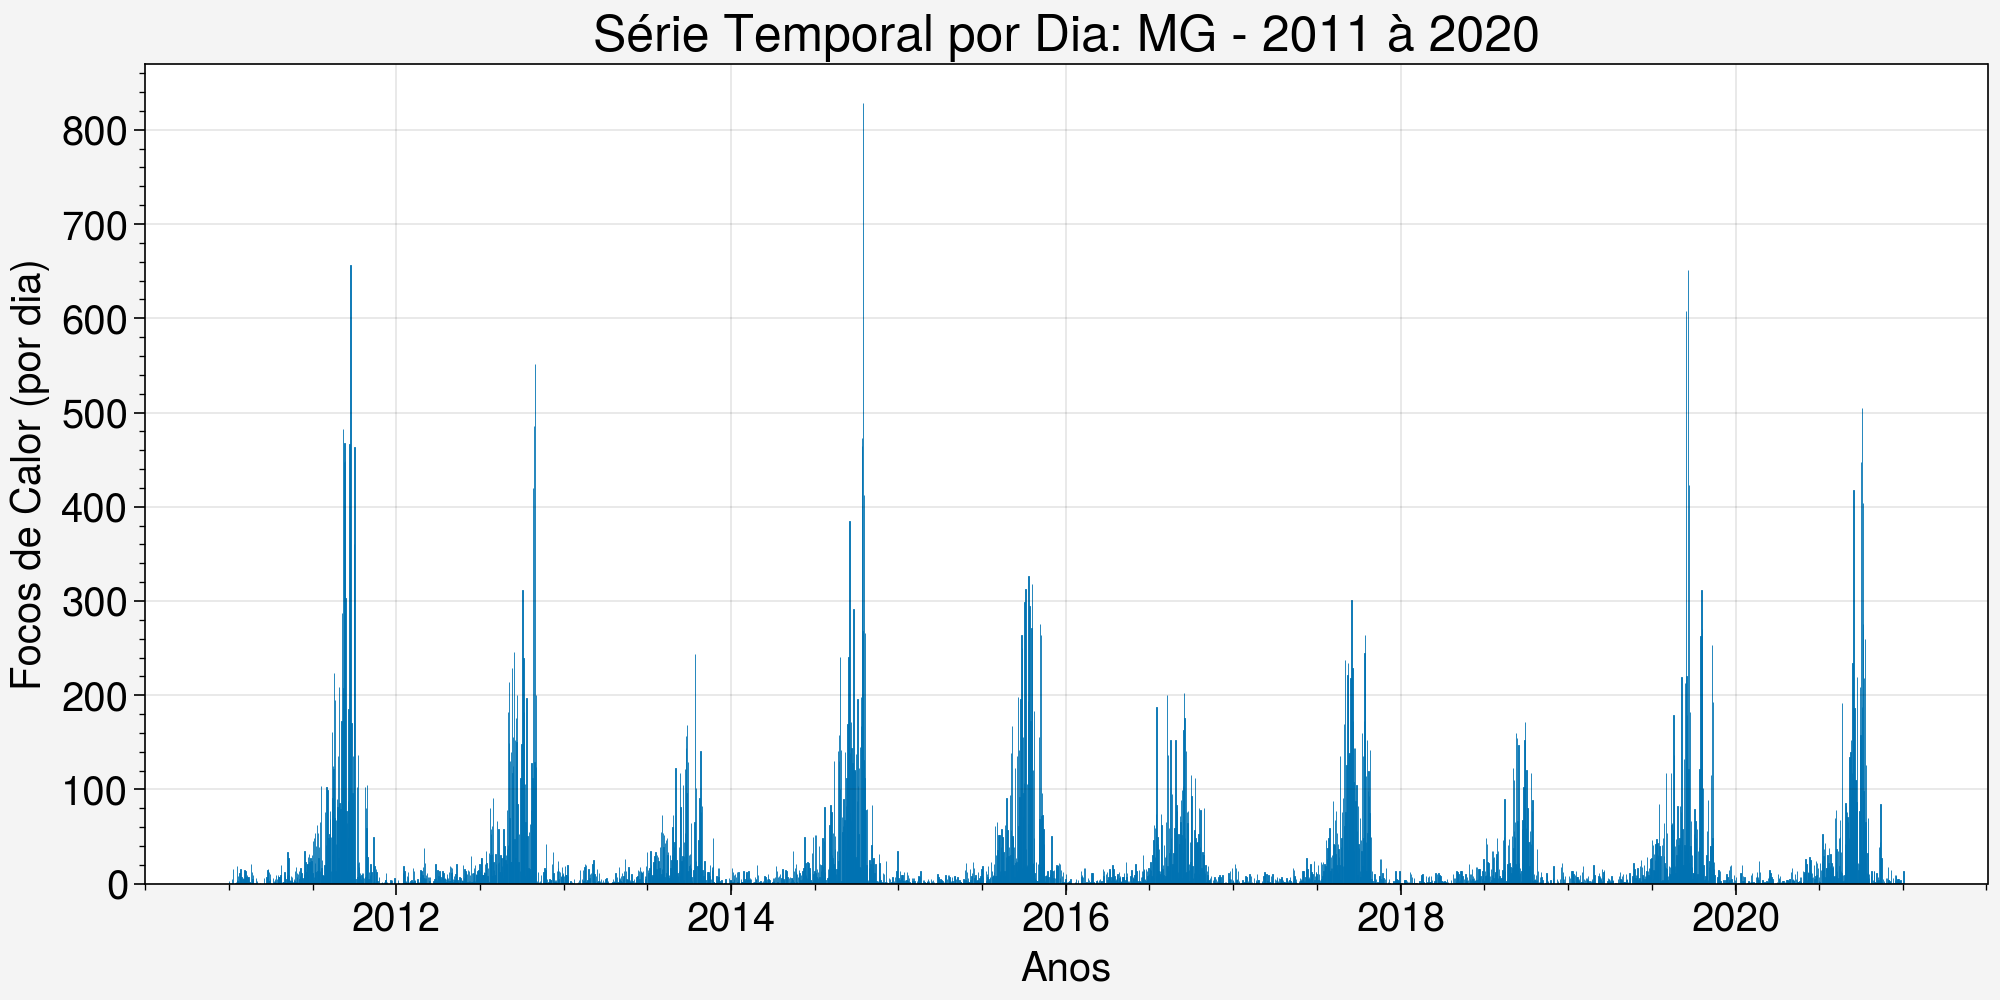

In [442]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(10,5), tight=True)

# plota gráfico de barras
ax.bar(diaria['flag'].index,
       diaria['flag'])

# formato dos eixos
ax.format(title='Série Temporal por Dia: MG - 2011 à 2020',
          xlabel='Anos',
          ylabel='Focos de Calor (por dia)',
          small='20px',
          large='25px',
          xrotation=0)

# salva figura
fig.save(f'{dir}output/Fig_2_diario.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# **PARTE 4c):** Ciclo Mensal: Total e Climatológica

**Mensal Total**

In [443]:
mensal

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-01-31 00:00:00-02:00,0.0,0.0,0.0,-1957.957000,-4975.205000,0.0,112
2011-02-28 00:00:00-03:00,0.0,0.0,0.0,-2340.205000,-5792.228000,0.0,131
2011-03-31 00:00:00-03:00,0.0,0.0,0.0,-1457.609000,-3625.815000,0.0,82
2011-04-30 00:00:00-03:00,0.0,0.0,0.0,-1759.648000,-4413.562000,0.0,97
2011-05-31 00:00:00-03:00,0.0,0.0,0.0,-3610.417000,-9070.806000,0.0,201
...,...,...,...,...,...,...,...
2020-08-31 00:00:00-03:00,52481.0,58.1,-20947.3,-22547.927349,-53218.473272,48837.3,1155
2020-09-30 00:00:00-03:00,145785.0,572.4,-56615.3,-64987.996000,-156557.300000,238078.8,3467
2020-10-31 00:00:00-03:00,28535.0,2078.9,-11764.6,-42671.129000,-107413.933000,199356.0,2404


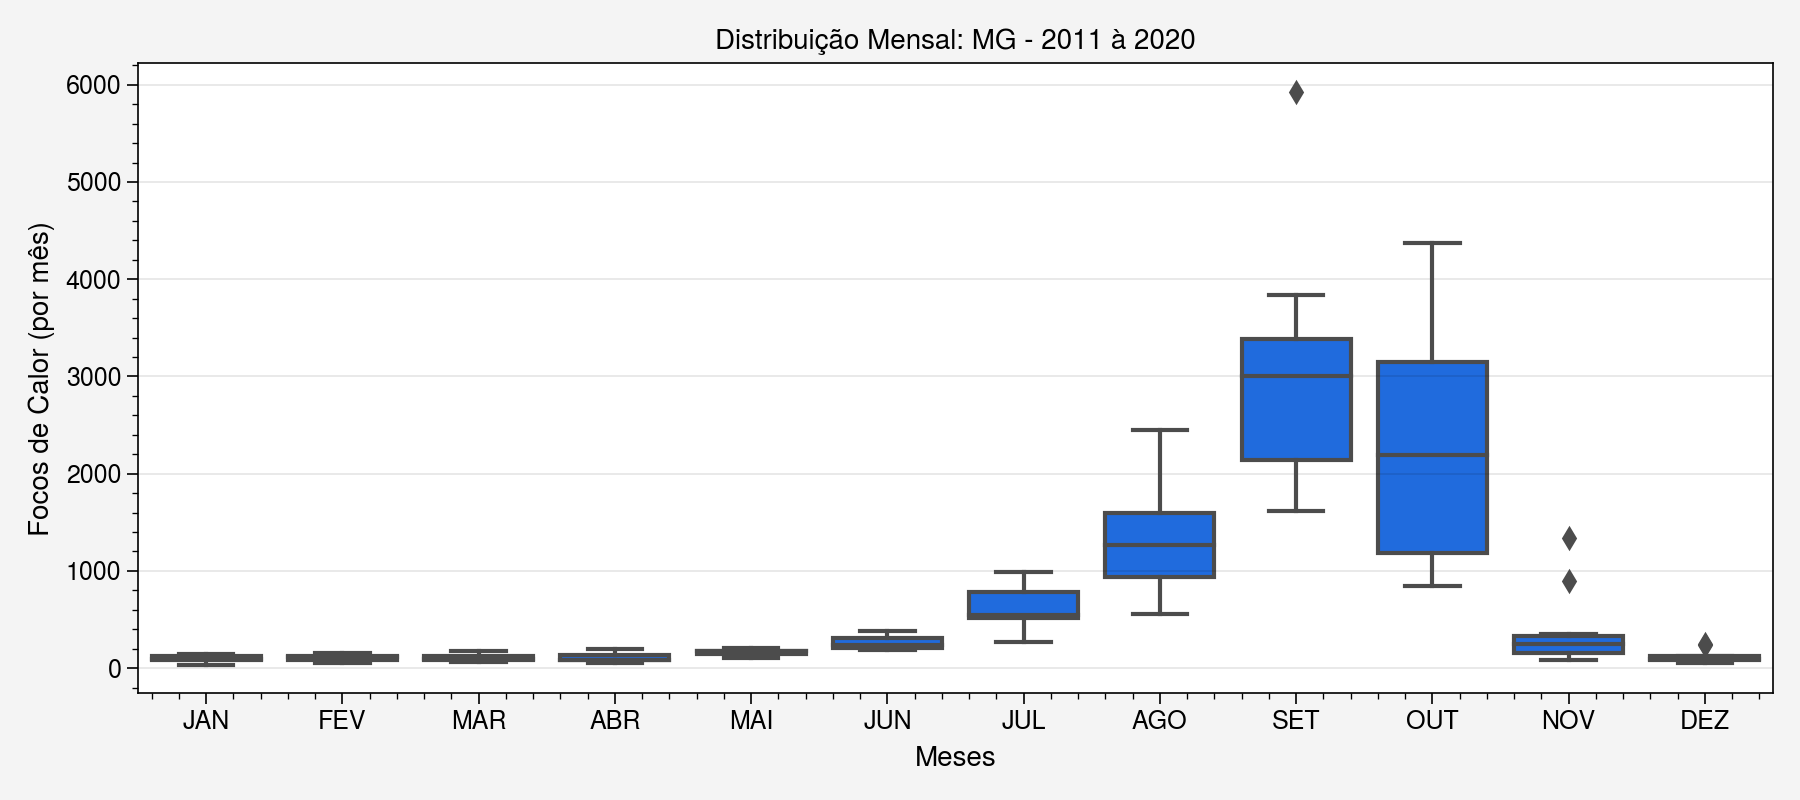

In [444]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4))

# criar boxplot de focos de calor mensal
sns.boxplot(x=mensal.index.month,
            y=mensal['flag'],
            color='bright blue')

# configuração da figura
ax.set_ylabel('Focos de Calor (por mês)', fontsize=10)
ax.set_xlabel('Meses', fontsize=10)
ax.set_title('Distribuição Mensal: MG - 2011 à 2020', fontsize=10)
ax.set_xticklabels(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'])

# salva figura
plt.savefig(f'{dir}output/Fig_3_mensal.jpg', dpi=300, bbox_inches='tight')

# exibe figura na tela
plt.tight_layout()
plt.show()

**Mensal climatológica**

In [445]:
mensal_climatologia

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
1,311.8,79.02,-2362.88,-1730.367500,-4300.484300,617.66,97.2
2,280.1,107.13,-3467.80,-1947.213600,-4850.702500,554.06,108.8
3,199.3,74.37,-1065.69,-1834.898800,-4603.882800,740.12,102.9
4,426.8,23.29,-745.34,-1919.227800,-4759.529200,393.22,106.5
5,710.8,15.85,-1307.04,-2974.219500,-7397.538900,1096.64,164.2
6,2512.0,15.31,-2428.09,-4815.918700,-11877.613500,2304.82,262.8
7,10570.8,35.54,-10395.08,-11782.098400,-28372.327500,6167.98,626.9
8,17642.8,153.96,-14838.26,-25138.632335,-60085.712627,13345.42,1330.0
9,37046.8,327.31,-21541.11,-56087.839500,-136051.427400,57856.32,3047.5


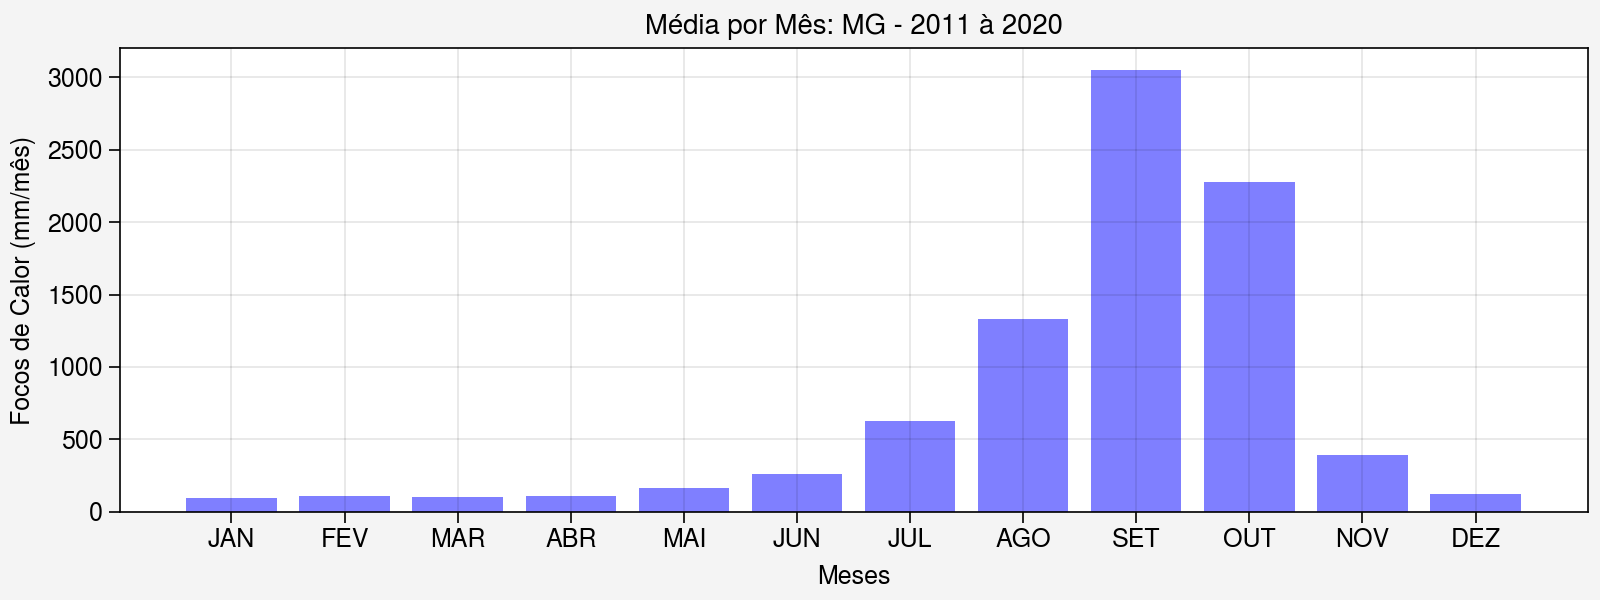

In [446]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(8, 3), tight=True)

# focos de calor
ax.bar(pplt.arange(1, 12, 1),
       mensal_climatologia['flag'],
       color='blue',
       alpha=0.5)

# formatações
ax.format(title='Média por Mês: MG - 2011 à 2020',
          xlabel='Meses',
          ylabel='Focos de Calor (mm/mês)',
          xticklabels=['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN',
                       'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'],
          xticks=pplt.arange(1, 12, 1),
          xtickminor=False, ytickminor=False)

# salva figura
fig.save(f'{dir}output/Fig_4_mensal_climatologia.jpg', dpi=300)

# exibe figura na tela
pplt.show()

Como podemos ver, criar *boxplots* é uma tarefa razoavelmente simples com Python e `Seaborn`. É possível fazer muito mais (veja a seção da [*Python Graph Gallery*](https://www.python-graph-gallery.com/boxplot/) sobre o tema), como *violinplots* e combinar *stripplots* nos gráficos.

# **PARTE 4d):** Ciclo Anual: Total

In [447]:
anual

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-12-31 00:00:00-02:00,0.0,0.0,0.0,-214250.864000,-521832.473000,0.0,11766
2012-12-31 00:00:00-02:00,0.0,0.0,0.0,-175763.327000,-445385.607000,0.0,10108
2013-12-31 00:00:00-02:00,0.0,0.0,0.0,-96271.588000,-239336.673000,0.0,5387
2014-12-31 00:00:00-02:00,153750.0,3428.3,-126073.9,-209700.268000,-504631.579000,0.0,11337
2015-12-31 00:00:00-02:00,152866.0,2912.4,-60880.7,-167173.629000,-415585.819000,0.0,9490
2016-12-31 00:00:00-02:00,100491.0,2940.9,-85122.5,-122118.043000,-293014.663000,0.0,6482
2017-12-31 00:00:00-02:00,3463.0,1594.2,-127015.7,-158915.974000,-377055.884000,0.0,8383
2018-12-31 00:00:00-02:00,62692.0,1549.2,-53950.5,-83937.722000,-206218.326000,206586.1,4627
2019-12-31 00:00:00-03:00,177758.0,2916.0,-136014.4,-186064.783000,-444468.238000,511927.3,9999


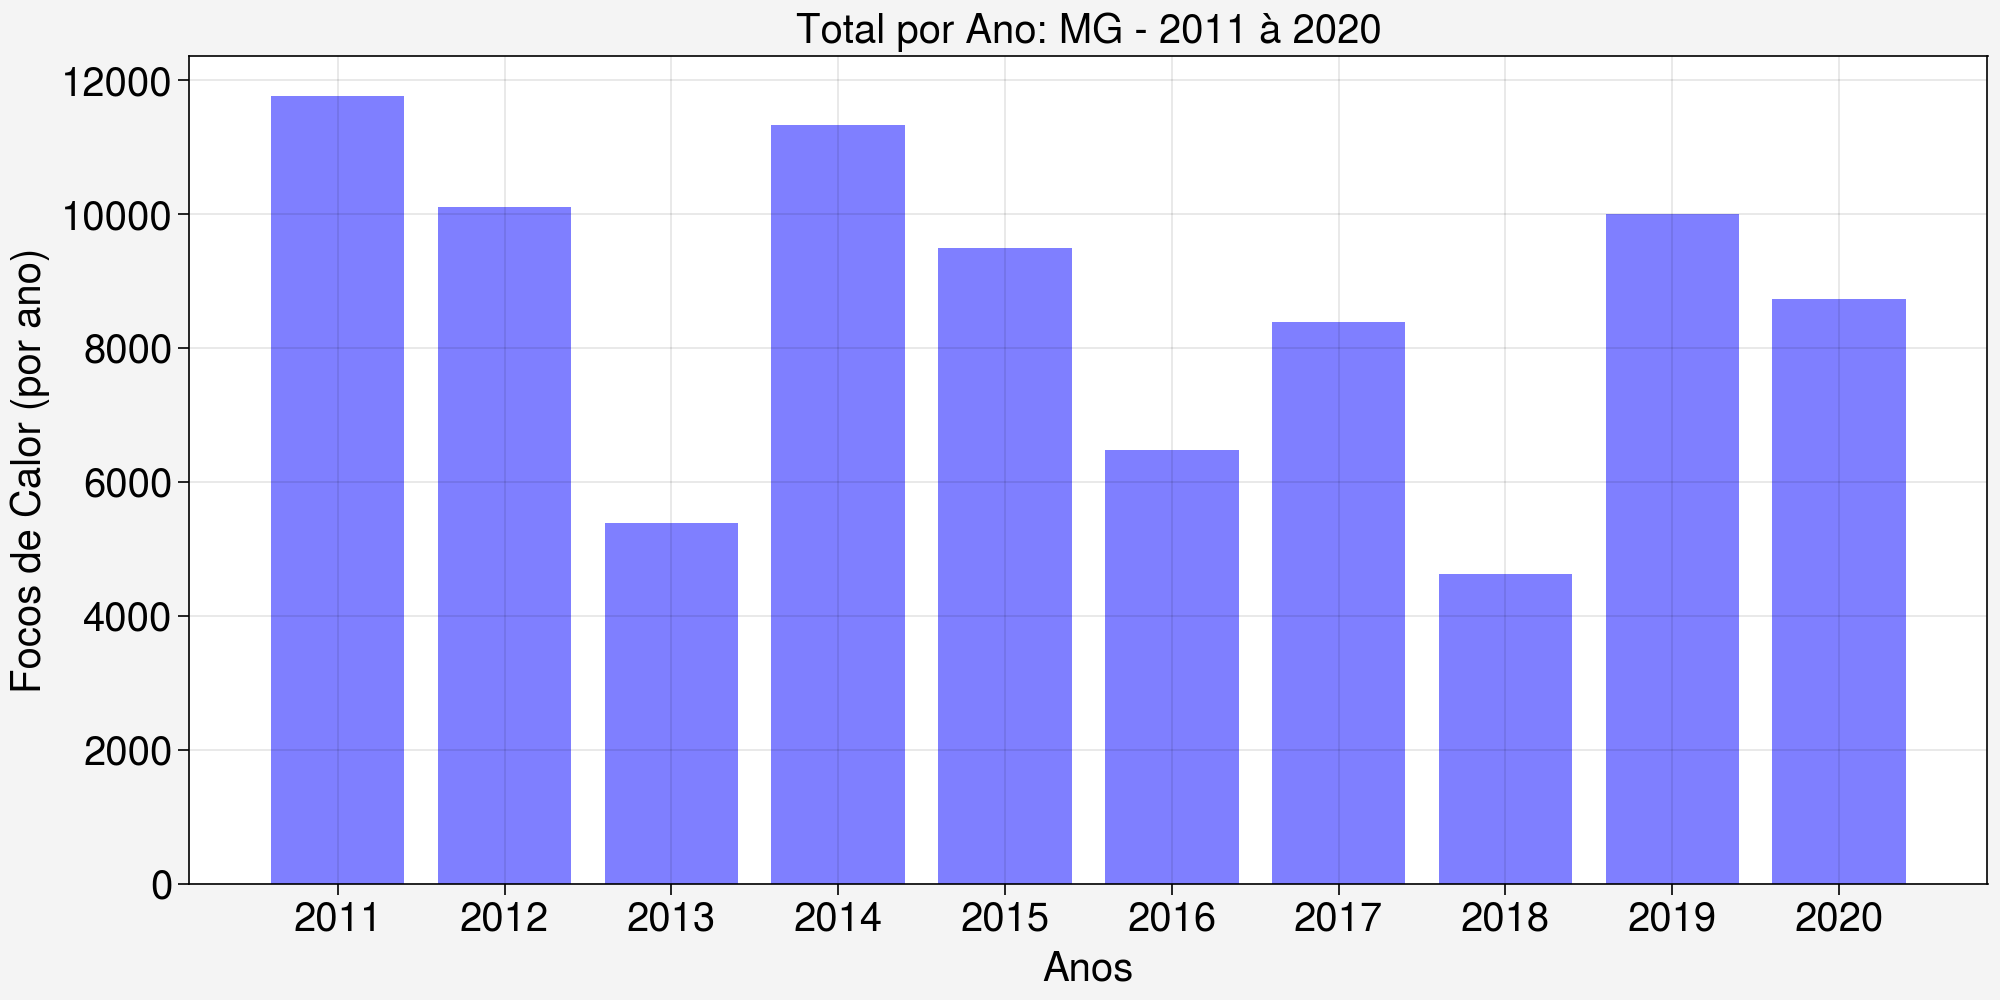

In [448]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual['flag'].values,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='Total por Ano: MG - 2011 à 2020',
          xlabel='Anos',
          ylabel='Focos de Calor (por ano)',
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2011,2020,1))

# salva figura
fig.save(f'{dir}output/Fig_5_anual.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# **PARTE 4e):** Salvando a tabela num arquivo CSV:
* `Salvar` o `DataFrame` em formato csv com `.to_csv()`

In [449]:
mensal

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,
2011-01-31 00:00:00-02:00,0.0,0.0,0.0,-1957.957000,-4975.205000,0.0,112
2011-02-28 00:00:00-03:00,0.0,0.0,0.0,-2340.205000,-5792.228000,0.0,131
2011-03-31 00:00:00-03:00,0.0,0.0,0.0,-1457.609000,-3625.815000,0.0,82
2011-04-30 00:00:00-03:00,0.0,0.0,0.0,-1759.648000,-4413.562000,0.0,97
2011-05-31 00:00:00-03:00,0.0,0.0,0.0,-3610.417000,-9070.806000,0.0,201
...,...,...,...,...,...,...,...
2020-08-31 00:00:00-03:00,52481.0,58.1,-20947.3,-22547.927349,-53218.473272,48837.3,1155
2020-09-30 00:00:00-03:00,145785.0,572.4,-56615.3,-64987.996000,-156557.300000,238078.8,3467
2020-10-31 00:00:00-03:00,28535.0,2078.9,-11764.6,-42671.129000,-107413.933000,199356.0,2404


**a) Para formatar melhor a tabela, você pode remover o `index` das datas e criar novas colunas para os anos e meses.**

In [450]:
# remover o índice de datas
nova_tabela = mensal.reset_index(drop=True)

In [451]:
# incluir uma coluna de danos na posição 1
nova_tabela.insert(0, 'Ano', mensal.index.year)

In [452]:
# incluir uma coluna de meses na posição 2
nova_tabela.insert(1, 'Mês', mensal.index.month)

In [453]:
# remover colunas que não serão utilizadas
nova_tabela.drop(['latitude','longitude'], axis=1, inplace=True)

In [454]:
# mostrando a nova tabela
nova_tabela

,Ano,Mês,diasemchuva,precipitacao,riscofogo,frp,flag
0,2011,1,0.0,0.0,0.0,0.0,112
1,2011,2,0.0,0.0,0.0,0.0,131
2,2011,3,0.0,0.0,0.0,0.0,82
3,2011,4,0.0,0.0,0.0,0.0,97
4,2011,5,0.0,0.0,0.0,0.0,201
...,...,...,...,...,...,...,...
115,2020,8,52481.0,58.1,-20947.3,48837.3,1155
116,2020,9,145785.0,572.4,-56615.3,238078.8,3467
117,2020,10,28535.0,2078.9,-11764.6,199356.0,2404
118,2020,11,1061.0,326.1,-2812.5,6695.9,281


**b) E agora, você pode salvar o DataFrame em formato csv usando a função [to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html):**

In [455]:
nova_tabela.to_csv(f'{dir}output/focos_mensal.csv')

# **PARTE 5):**  *Calendarplots*

Vamos plotar uma figura que mostra a distrbuição de ocorrência de focos de calor por `dia da semana` e `mês`. Para isto usaremos a biblioteca [calplot](https://calplot.readthedocs.io/en/latest/).

Leitura e preparação dos dados

In [456]:
# leitura dos dados
df_2017 = pd.read_csv(f'{dir}input/Focos_2017-01-01_2017-12-31.csv')
df_2018 = pd.read_csv(f'{dir}input/Focos_2018-01-01_2018-12-31.csv')
df_2019 = pd.read_csv(f'{dir}input/Focos_2019-01-01_2019-12-31.csv')
df_2020 = pd.read_csv(f'{dir}input/Focos_2020-01-01_2020-12-31.csv')

# seleciona os focos detectados apenas pelo satélite AQUA_M-T
df_2017 = df_2017[ df_2017['satelite']=='AQUA_M-T' ]
df_2018 = df_2018[ df_2018['satelite']=='AQUA_M-T' ]
df_2019 = df_2019[ df_2019['satelite']=='AQUA_M-T' ]
df_2020 = df_2020[ df_2020['satelite']=='AQUA_M-T' ]

# transforma a coluna "datahora" para o formato "datetime"
df_2017['datahora'] = pd.to_datetime(df_2017['datahora'])
df_2018['datahora'] = pd.to_datetime(df_2018['datahora'])
df_2019['datahora'] = pd.to_datetime(df_2019['datahora'])
df_2020['datahora'] = pd.to_datetime(df_2020['datahora'])

# seta a coluna "datahora" como o índice da tabela
df_2017.set_index('datahora', inplace=True)
df_2018.set_index('datahora', inplace=True)
df_2019.set_index('datahora', inplace=True)
df_2020.set_index('datahora', inplace=True)

# mostra a tabela de 2017
df_2017

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
datahora,,,,,,,,,,,
2017-01-05 16:18:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.9,0.7,-20.608,-43.510,NaN
2017-02-20 16:31:00,AQUA_M-T,Brasil,MINAS GERAIS,FORTALEZA DE MINAS,Mata Atlantica,0,0.0,0.3,-20.874,-46.796,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,PASSOS,Cerrado,0,6.5,-999.0,-20.708,-46.620,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIA,Cerrado,0,0.5,0.7,-19.511,-46.654,NaN
2017-01-08 16:49:00,AQUA_M-T,Brasil,MINAS GERAIS,GUARDA-MOR,Cerrado,0,0.0,1.0,-17.766,-46.932,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-10-19 17:13:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.0,1.0,-20.323,-43.470,NaN
2017-10-19 17:13:00,AQUA_M-T,Brasil,MINAS GERAIS,OURO PRETO,Mata Atlantica,0,0.0,0.9,-20.376,-43.595,NaN
2017-11-21 16:20:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,0,0.3,1.0,-15.093,-43.688,NaN


Agrupando os dados por dia

In [457]:
# agrupa os dados por dia
df_2017_dia = df_2017.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2018_dia = df_2018.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2019_dia = df_2019.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']
df_2020_dia = df_2020.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1D')).count()['estado']

# mostra os dados de 2017
df_2017_dia

datahora
2017-01-01     2
2017-01-02     0
2017-01-03    21
2017-01-04     0
2017-01-05    17
              ..
2017-12-26     4
2017-12-27     0
2017-12-28    13
2017-12-29     0
2017-12-30     1
Freq: D, Name: estado, Length: 364, dtype: int64

Plota figura

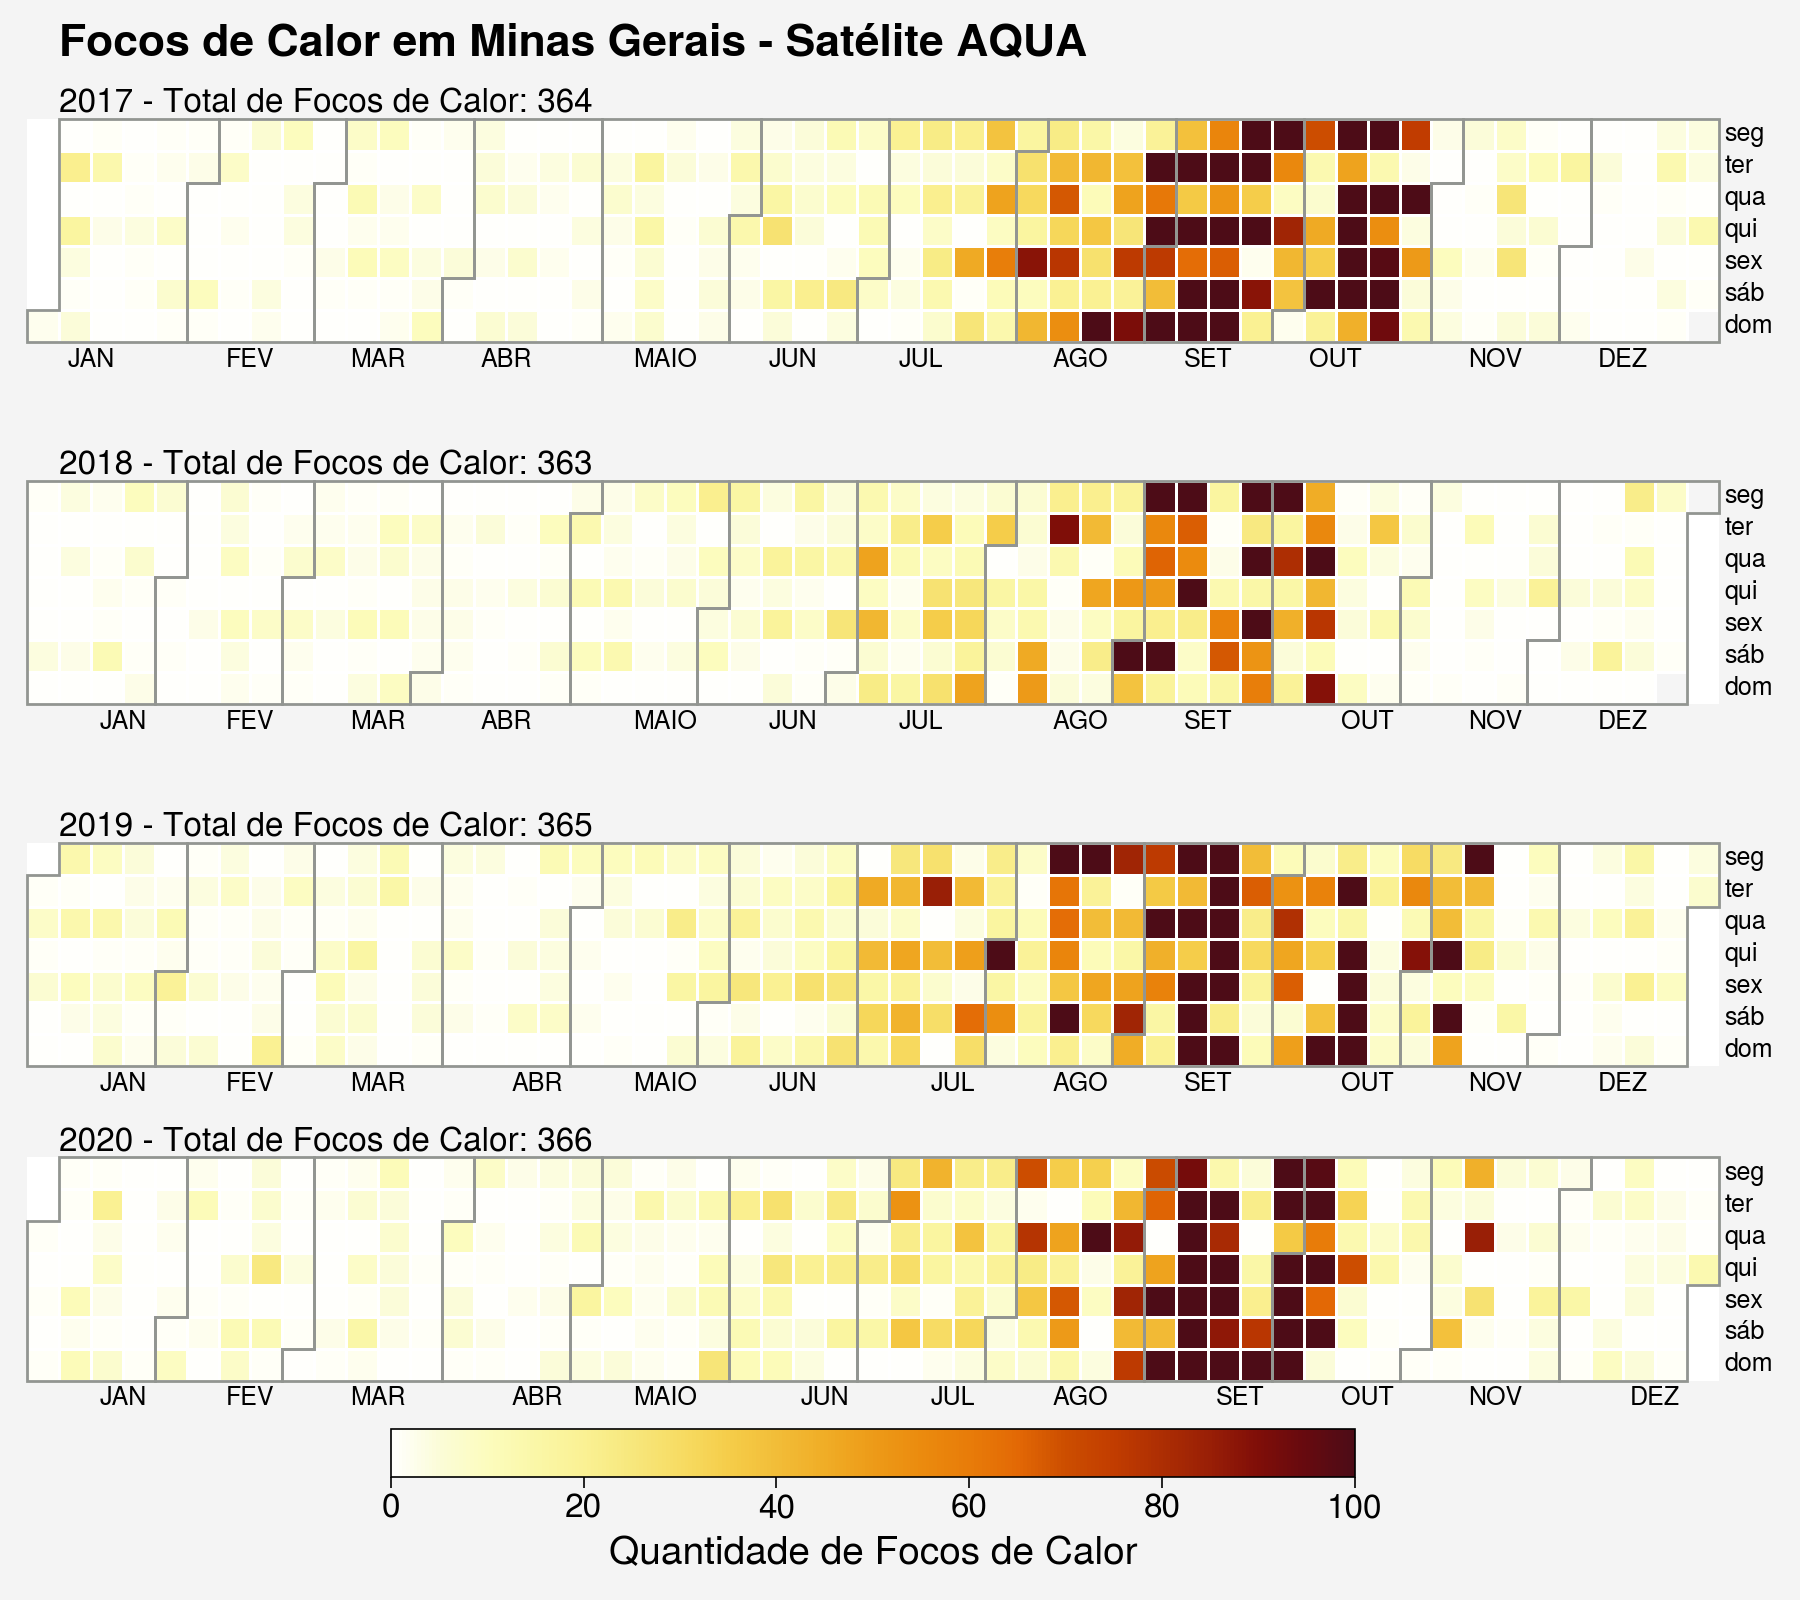

In [458]:
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(9,8), nrows=4)

# labels dos "dias da semana" e "meses do ano"
dias=['seg', 'ter', 'qua', 'qui', 'sex','sáb', 'dom']
meses=['JAN', 'FEV', 'MAR', 'ABR', 'MAIO', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

#========================================================#
#                 FIGURA A) - 2017
#========================================================#
map1 = calplot.yearplot(df_2017_dia,
                        cmap='Oranges1',
                        daylabels=dias,
                        monthlabels=meses,
                        vmin=0,
                        vmax=100,
                        ax=ax[0])

#========================================================#
#                  FIGURA B) - 2018
#========================================================#
calplot.yearplot(df_2018_dia,
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[1])

#========================================================#
#                  FIGURA C) - 2019
#========================================================#
calplot.yearplot(df_2019_dia,
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[2])

#========================================================#
#                  FIGURA D) - 2020
#========================================================#
calplot.yearplot(df_2020_dia,
                 cmap='Oranges1',
                 daylabels=dias,
                 monthlabels=meses,
                 vmin=0,
                 vmax=100,
                 ax=ax[3])

#========================================================#
#                  DEMAIS DEFINIÇÕES
#========================================================#
# barra de cores
cb = fig.colorbar(map1.get_children()[1], orientation='horizontal', ticks=pplt.arange(0, 100, 20), shrink=0.75, ax=ax[3])
cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='minor', width=0)
cb.set_label('Quantidade de Focos de Calor', fontsize=14)

# textos
ax[0].text(1., 9., 'Focos de Calor em Minas Gerais - Satélite AQUA', fontsize=16, color='black', fontweight='bold')
ax[0].text(1., 7.2, f'2017 - Total de Focos de Calor: {df_2017_dia.shape[0]}', fontsize=12, color='black')
ax[1].text(1., 7.2, f'2018 - Total de Focos de Calor: {df_2018_dia.shape[0]}', fontsize=12, color='black')
ax[2].text(1., 7.2, f'2019 - Total de Focos de Calor: {df_2019_dia.shape[0]}', fontsize=12, color='black')
ax[3].text(1., 7.2, f'2020 - Total de Focos de Calor: {df_2020_dia.shape[0]}', fontsize=12, color='black')

# salva figura
plt.tight_layout()
plt.savefig(f'{dir}output/Fig_6_calendar_plot.jpg', bbox_inches='tight', dpi=300)
plt.show()

# **PARTE 6):**  BÔNUS #1: Encontrando a **cidade** em MG com a **maior** ocorrência de focos de calor

In [459]:
df['satelite'].unique()

array(['AQUA_M-T'], dtype=object)

**Contabiliza os valores as cidades 'únicas'**

In [460]:
df['municipio'].unique()

array(['PRATA', 'ITUIUTABA', 'SETUBINHA', 'NANUQUE', 'FELIXLANDIA',
       'CORINTO', 'VARJAO DE MINAS', 'PARACATU', 'BELO VALE',
       'BRUMADINHO', 'SAO DOMINGOS DO PRATA', 'FORTUNA DE MINAS', 'MUTUM',
       'RUBELITA', 'CAPITAO ENEAS', 'JANUARIA', 'FRANCISCO SA',
       'ANGELANDIA', 'CURRAL DE DENTRO', 'BOTUMIRIM', 'LASSANCE',
       'AGUAS VERMELHAS', 'IBIA', 'JEQUITINHONHA', 'JEQUITAI',
       'NOVO ORIENTE DE MINAS', 'ITURAMA', 'JOAIMA', 'GAMELEIRAS',
       'JOSENOPOLIS', 'PONTO DOS VOLANTES', 'JAIBA', 'SANTA VITORIA',
       'SAO JOAO DAS MISSOES', 'ITAMARANDIBA', 'ATALEIA', 'INDAIABIRA',
       'RIO PARDO DE MINAS', 'ARINOS', 'GALILEIA', 'POTE', 'BURITIZEIRO',
       'VARZEA DA PALMA', 'CRISTALIA', 'BRASILANDIA DE MINAS',
       'JOAO PINHEIRO', 'CARNEIRINHO', 'FORMOSO', 'CAMACHO',
       'SAO JOAO DEL REI', 'BELMIRO BRAGA', 'SABARA', 'VAZANTE',
       'LAGOA GRANDE', 'SERRO', 'SAO JOAO DA LAGOA', 'ALVORADA DE MINAS',
       'MANGA', 'LIMEIRA DO OESTE', 'ITAPECERICA', 'FREI

**Contabiliza quantas vezes o nome de cada cidade aparece nos dados**

In [461]:
df['municipio'].value_counts()

PARACATU                1547
JOAO PINHEIRO           1104
UNAI                    1086
UBERABA                 1080
BURITIZEIRO             1058
                        ... 
PIRANGUCU                  1
RIBEIRAO VERMELHO          1
ESTIVA                     1
ROCHEDO DE MINAS           1
CORREGO DO BOM JESUS       1
Name: municipio, Length: 846, dtype: int64

**Calcula o valor normalizado**

In [462]:
df['municipio'].value_counts(normalize=True)

PARACATU                0.017923
JOAO PINHEIRO           0.012790
UNAI                    0.012582
UBERABA                 0.012512
BURITIZEIRO             0.012257
                          ...   
PIRANGUCU               0.000012
RIBEIRAO VERMELHO       0.000012
ESTIVA                  0.000012
ROCHEDO DE MINAS        0.000012
CORREGO DO BOM JESUS    0.000012
Name: municipio, Length: 846, dtype: float64

**Extrai os valores das 5 primeiras cidades com maior ocorrência de focos de calor**

In [463]:
cidades = df['municipio'].value_counts(normalize=True).index[0:5]
cidades

Index(['PARACATU', 'JOAO PINHEIRO', 'UNAI', 'UBERABA', 'BURITIZEIRO'], dtype='object')

**Extrai os valores e multiplica por 100.**

In [464]:
valores = df['municipio'].value_counts(normalize=True).values[0:5]
valores = valores * 100. # multiplica por 100, o resultado será em porcentagem
valores

array([1.79225173, 1.27902127, 1.25816766, 1.25121646, 1.22572872])

**Plota a figura**

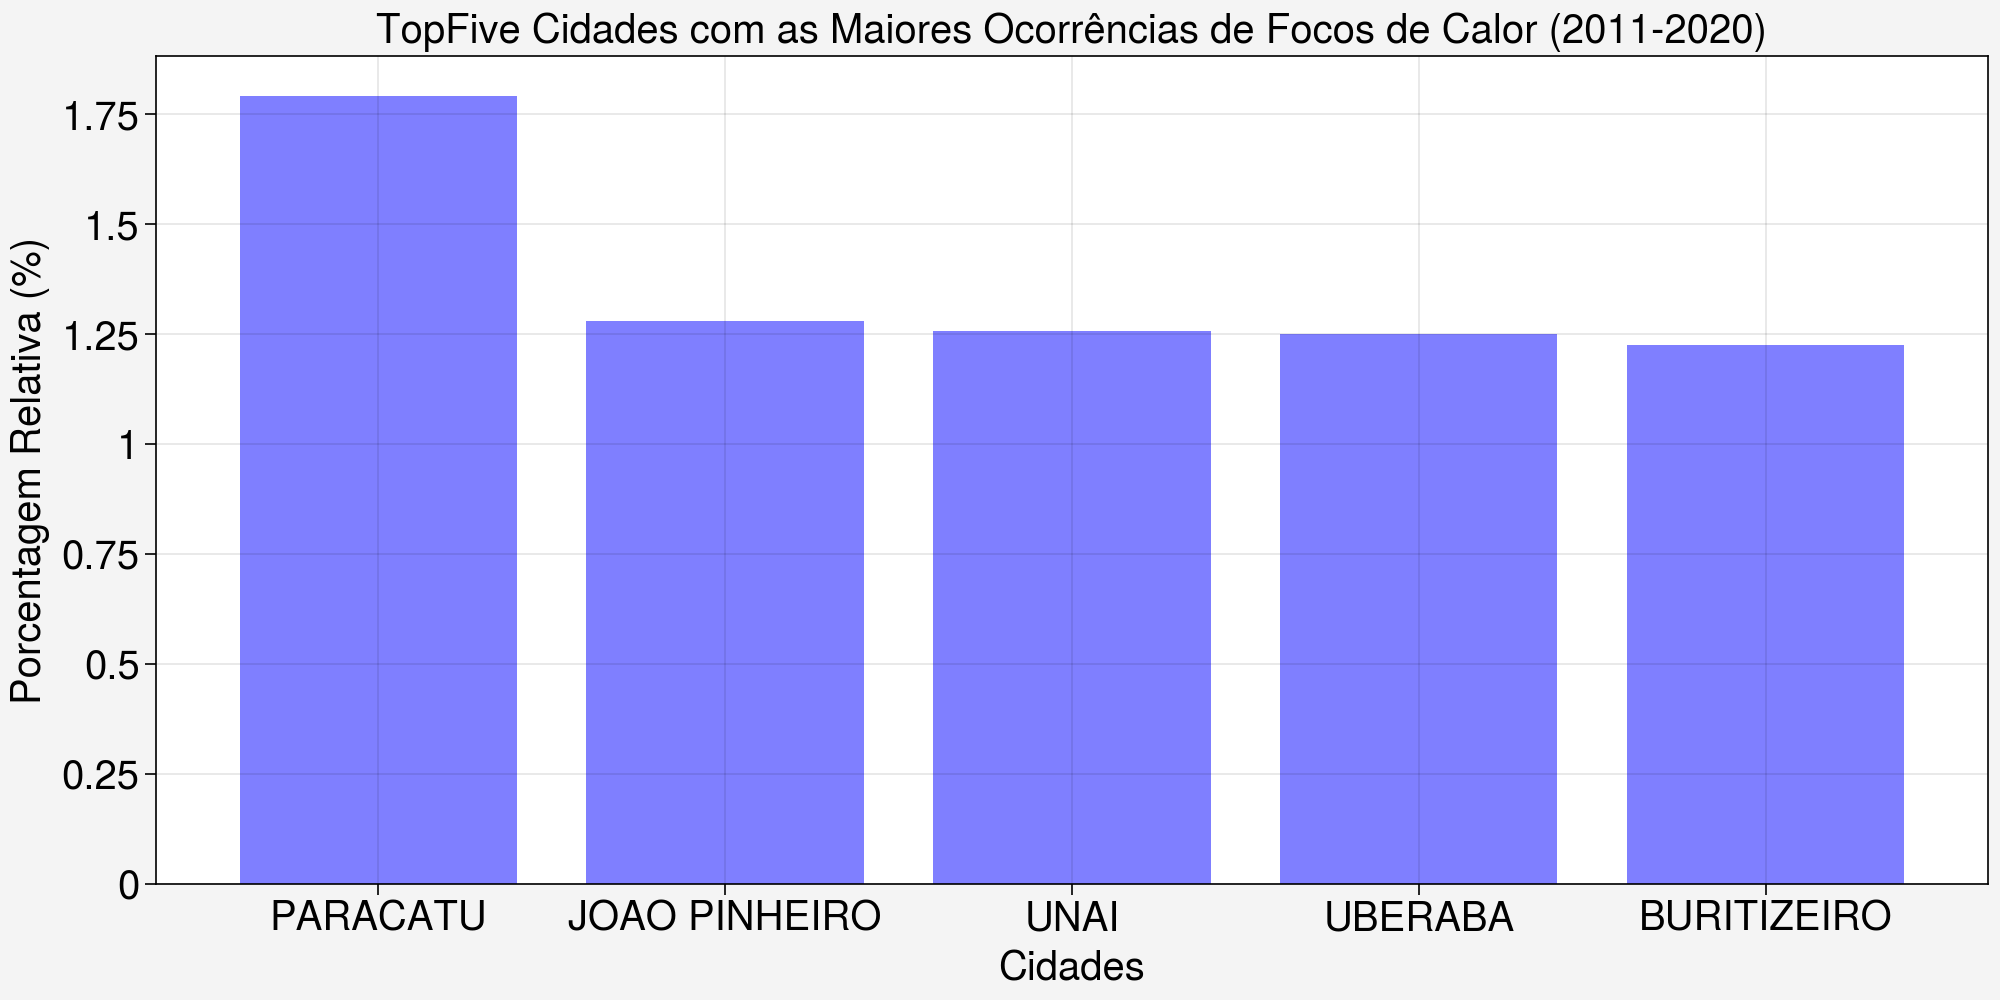

In [465]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de barras
ax.bar(cidades,
       valores,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='TopFive Cidades com as Maiores Ocorrências de Focos de Calor (2011-2020)',
          xlabel='Cidades',
          ylabel='Porcentagem Relativa (%)',
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'{dir}output/Fig_7_cidades.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# **PARTE 7):**  BÔNUS #2: Encontrando o **bioma** com a **maior** ocorrência de focos de calor

In [466]:
df

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,flag
datahora,,,,,,,,,,,,
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.533,-48.848,NaN,1
2011-01-01 14:43:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,PRATA,Cerrado,NaN,NaN,NaN,-19.535,-48.856,NaN,1
2011-01-01 14:44:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,ITUIUTABA,Cerrado,NaN,NaN,NaN,-19.076,-49.597,NaN,1
2011-01-03 14:32:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,SETUBINHA,Mata Atlantica,NaN,NaN,NaN,-17.530,-42.197,NaN,1
2011-01-05 14:19:00-02:00,AQUA_M-T,Brasil,MINAS GERAIS,NANUQUE,Mata Atlantica,NaN,NaN,NaN,-17.632,-40.447,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14 13:15:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,RUBELITA,Mata Atlantica,8.0,0.0,0.4,-16.344,-42.142,79.7,1
2020-01-16 13:05:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.4,-17.003,-41.197,48.3,1
2020-01-16 13:05:00-03:00,AQUA_M-T,Brasil,MINAS GERAIS,JOAIMA,Mata Atlantica,9.0,0.0,0.5,-17.001,-41.180,48.4,1


**Contabiliza os nomes que existem na coluna "bioma"**

In [467]:
df['bioma'].unique()

array(['Cerrado', 'Mata Atlantica', 'Caatinga'], dtype=object)

**Contabiliza quantas vezes o nome de cada bioma aparece nos dados**

In [468]:
df['bioma'].value_counts()

Cerrado           48338
Mata Atlantica    36088
Caatinga           1890
Name: bioma, dtype: int64

**Calcula o valor normalizado**

In [469]:
df['bioma'].value_counts(normalize=True)

Cerrado           0.560012
Mata Atlantica    0.418092
Caatinga          0.021896
Name: bioma, dtype: float64

**Extrai os valores das 5 primeiras cidades com maior ocorrcias de focos de calor**

In [470]:
cidades = df['bioma'].value_counts(normalize=True).index
cidades

Index(['Cerrado', 'Mata Atlantica', 'Caatinga'], dtype='object')

**Extrai os valores e multiplica por 100.**

In [471]:
valores = df['bioma'].value_counts(normalize=True).values
valores = valores * 100. # multiplica por 100, o resultado será em porcentagem
valores

array([56.00120488, 41.80916632,  2.18962881])

**Plota a figura**

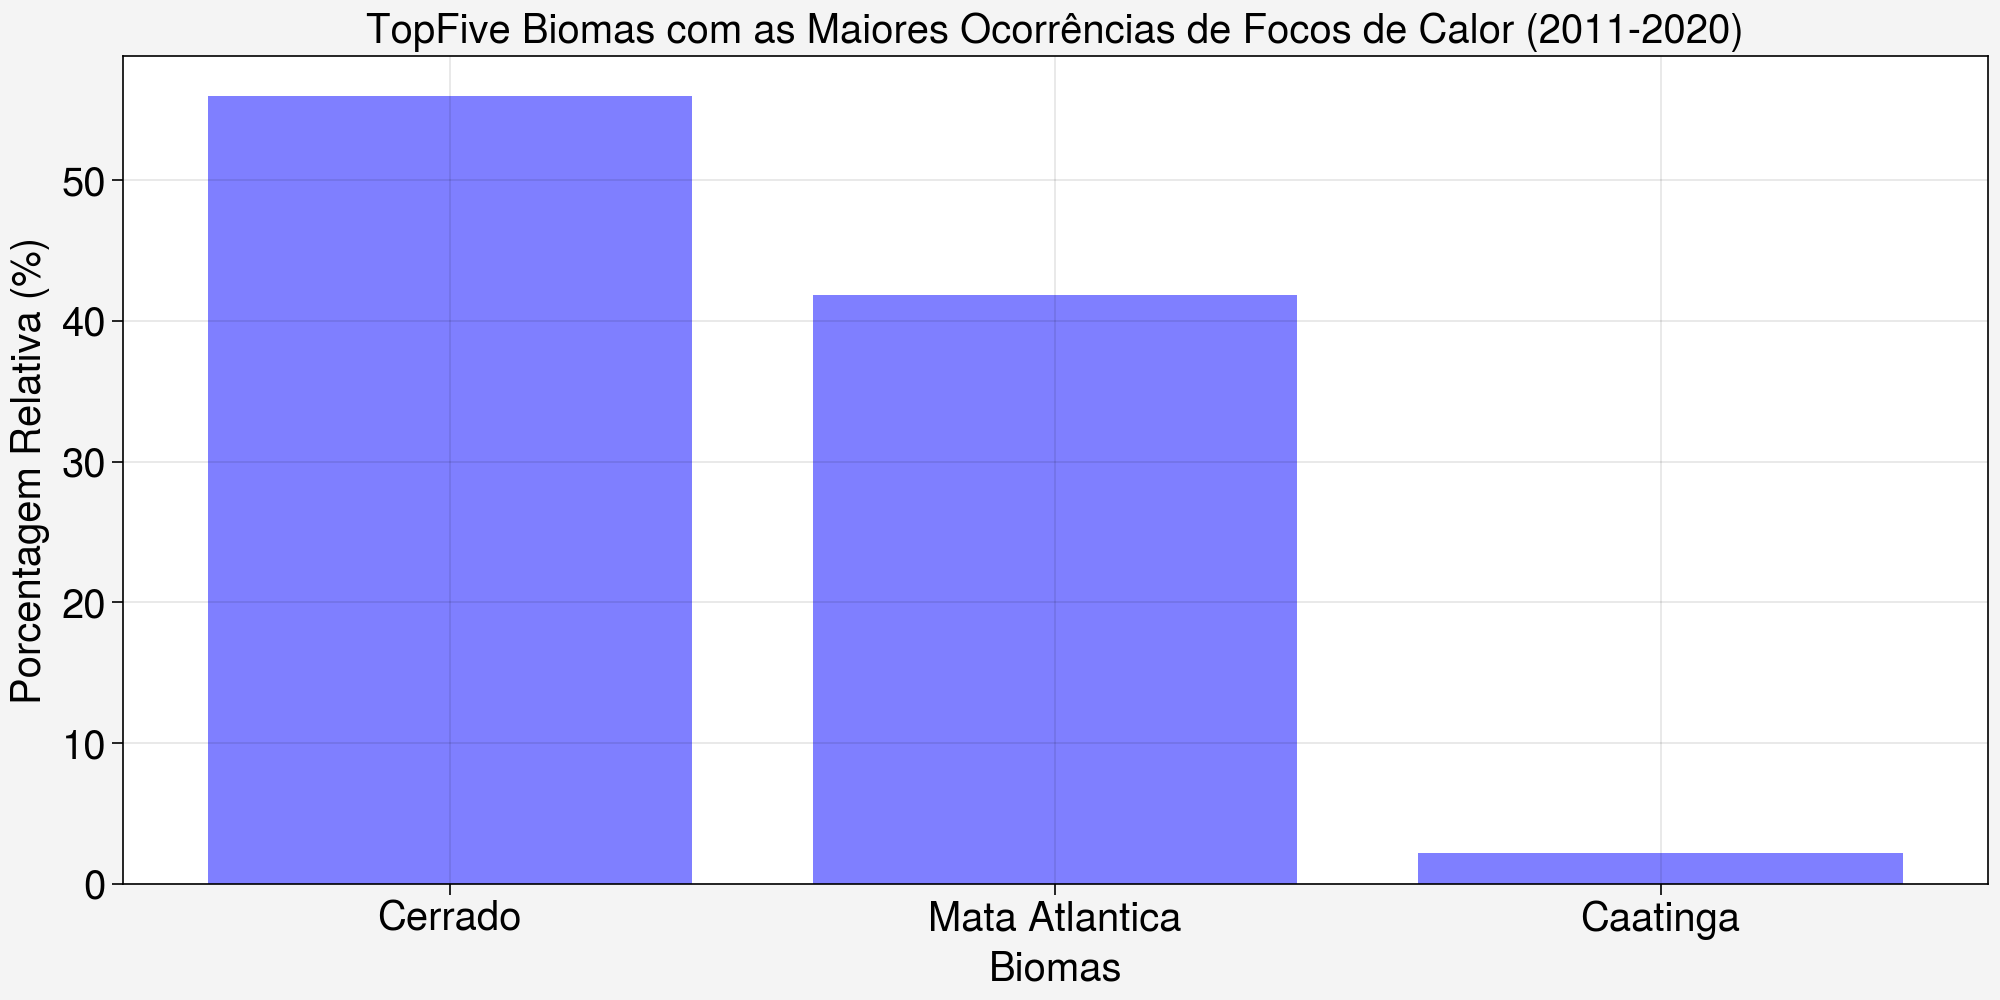

In [472]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(cidades,
       valores,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='TopFive Biomas com as Maiores Ocorrências de Focos de Calor (2011-2020)',
          xlabel='Biomas',
          ylabel='Porcentagem Relativa (%)',
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'{dir}output/Fig_8_biomas.jpg', dpi=300)

# exibe figura na tela
pplt.show()